# Experiment 3

Uniformly distributed $x_i$.

$$
\begin{align}
f(X) & = A \cdot X + b; \\ 
m & \ge 2; \\
s & = 5; \\
Z & = N(0, \sigma^2).
\end{align}
$$

This is an experiment that linear regression should be
very good at. $F$ is a linear function of $X$, there are a small number of
features, no confounding features, and normally distributed noise. If the
world was all like this, we would have no need for anything other than 
linear regression.

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import impactstudy.experiment as ise

## Configuration

In [16]:
N = 250

In [17]:
M = list(range(2, 11, 2))

In [18]:
S = 5

In [19]:
SIGMA = 20.0

## A Single Scenario For Manual Verification.

### Set Up the Scenario

In [20]:
experiment0 = ise.LinearWithNoiseExperiment(m=M[1], s=S, sigma=SIGMA)

### Generate Impact Charts

In [21]:
tags, scenario = next(experiment0.scenarios())

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


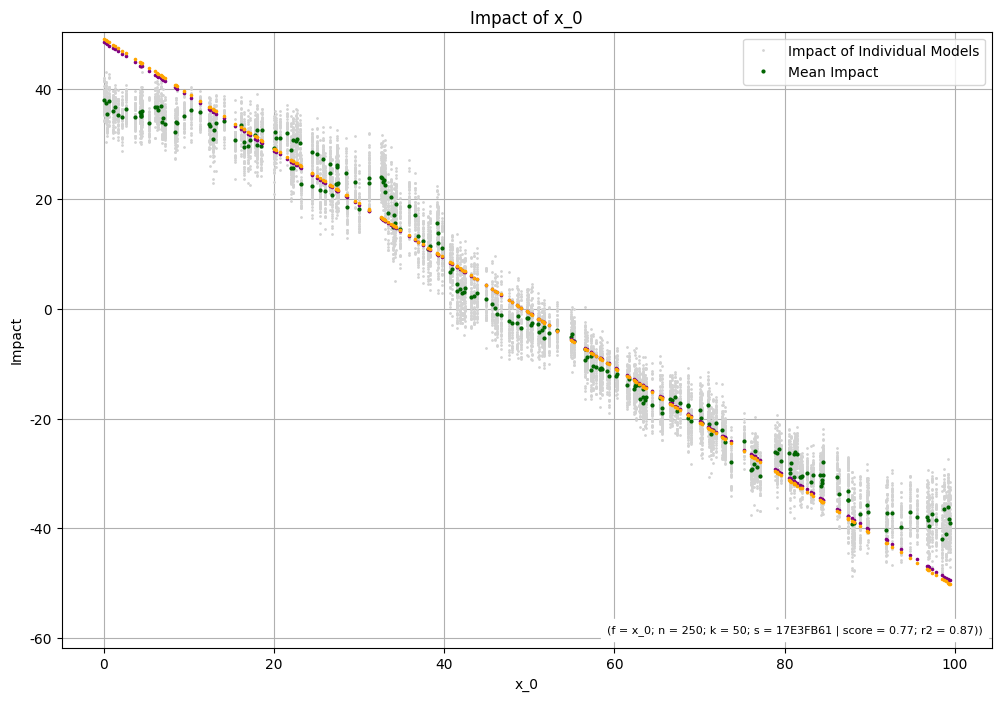

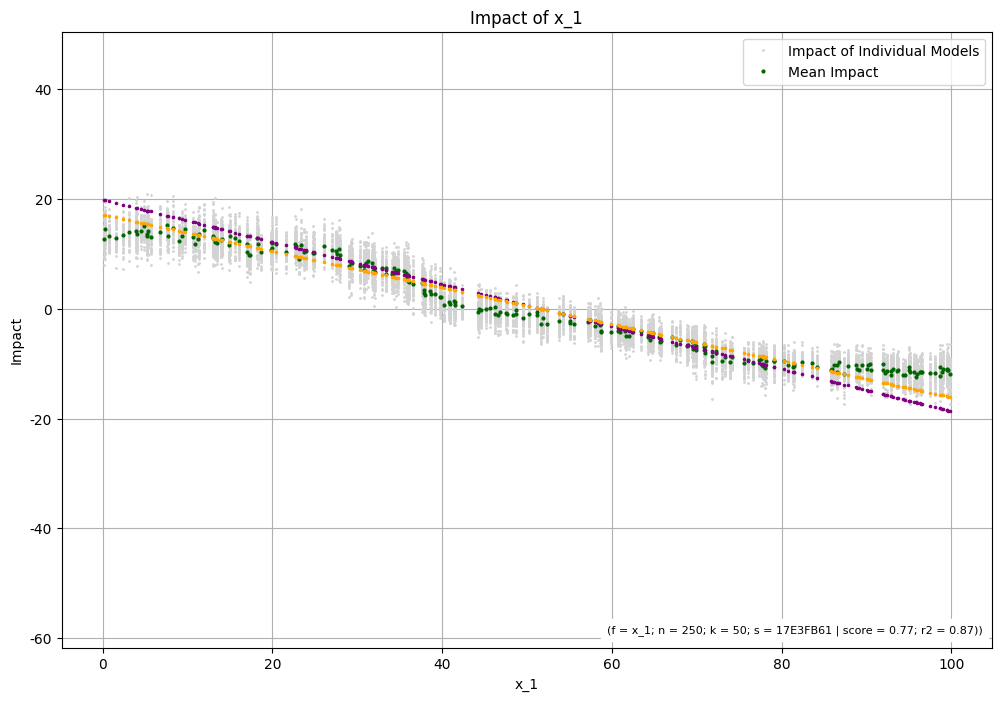

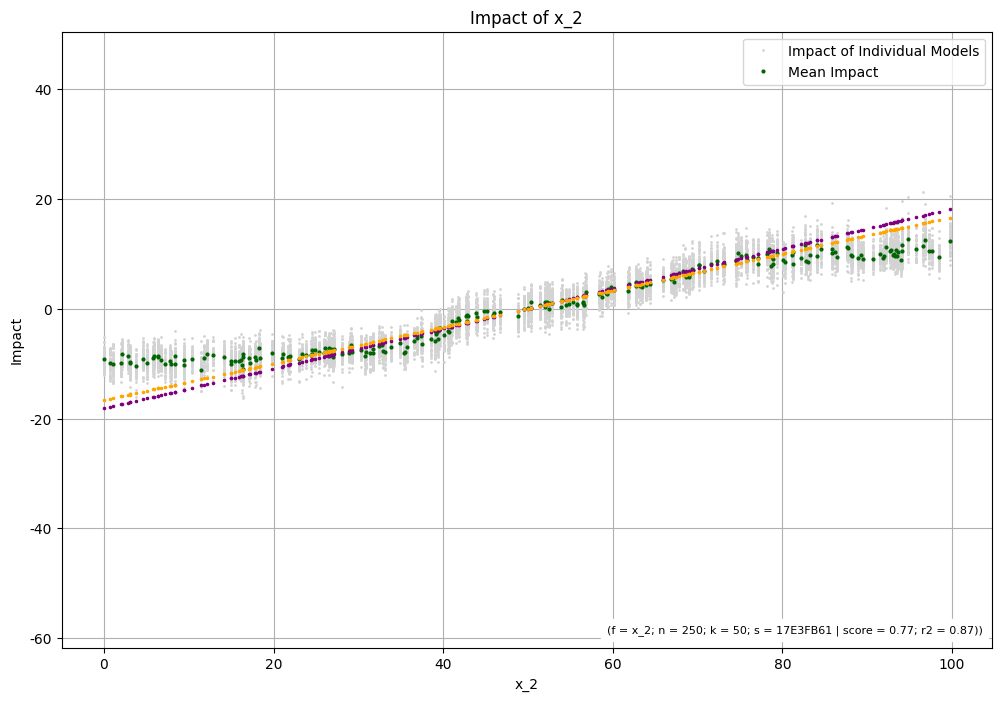

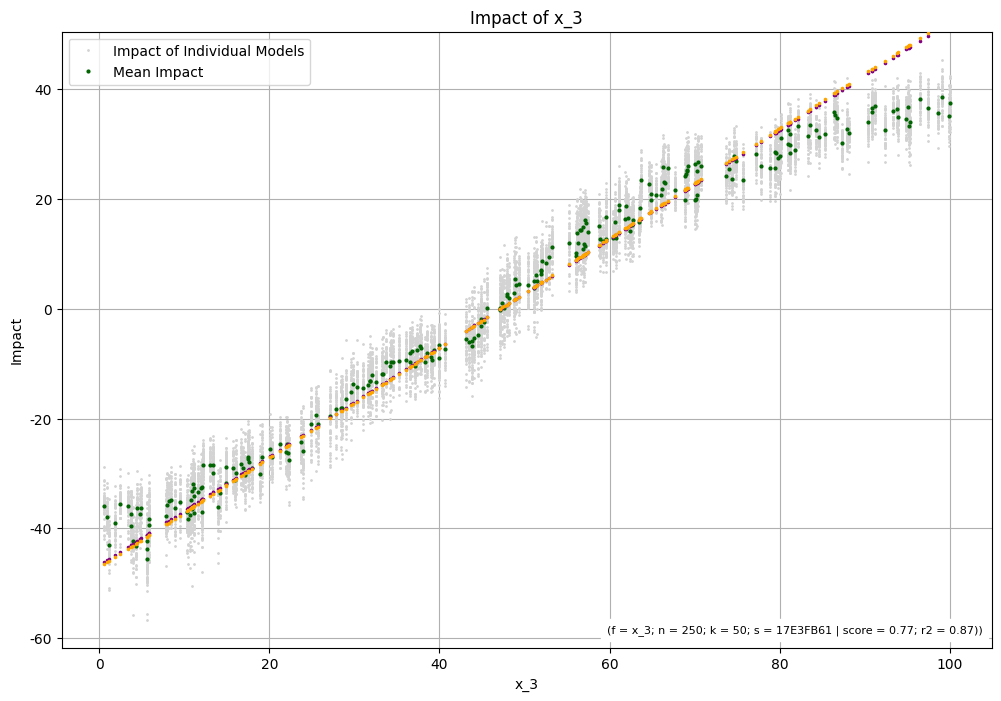

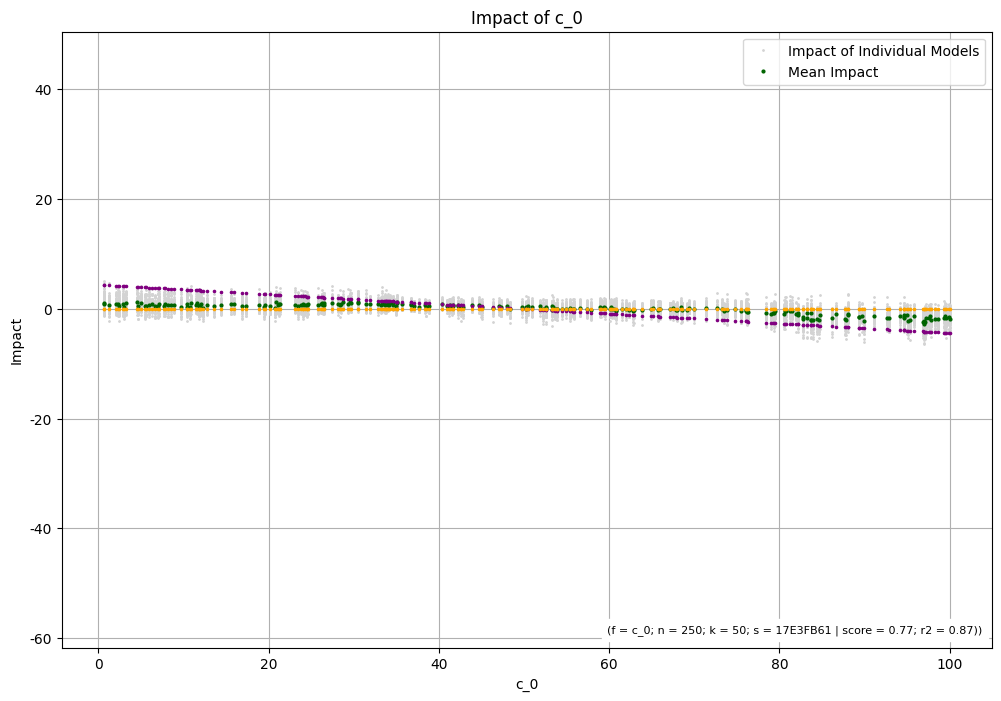

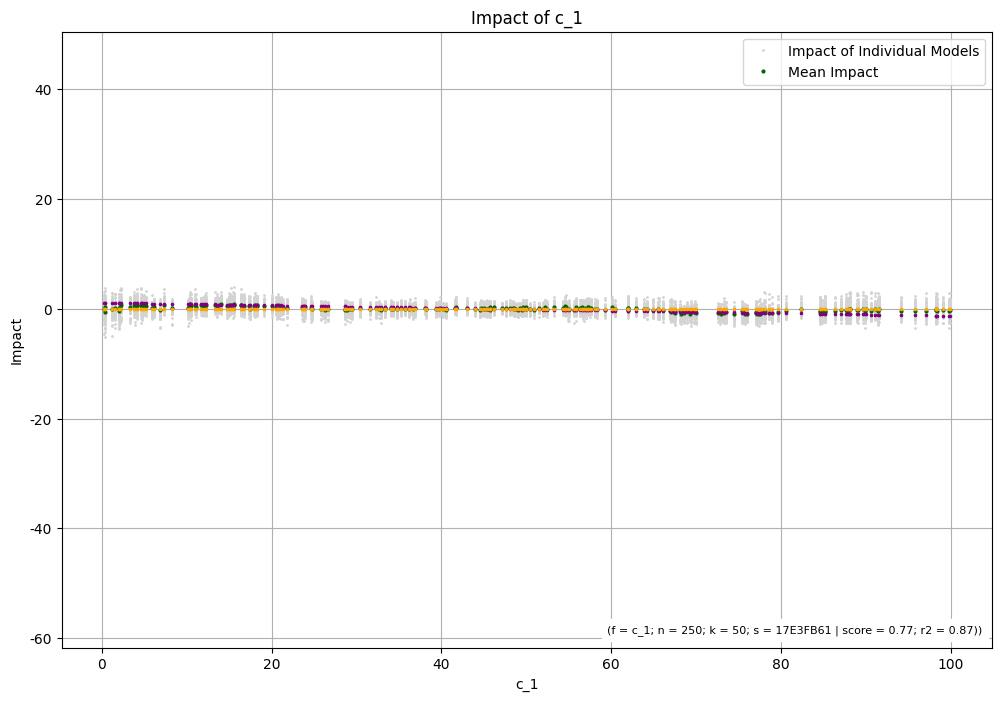

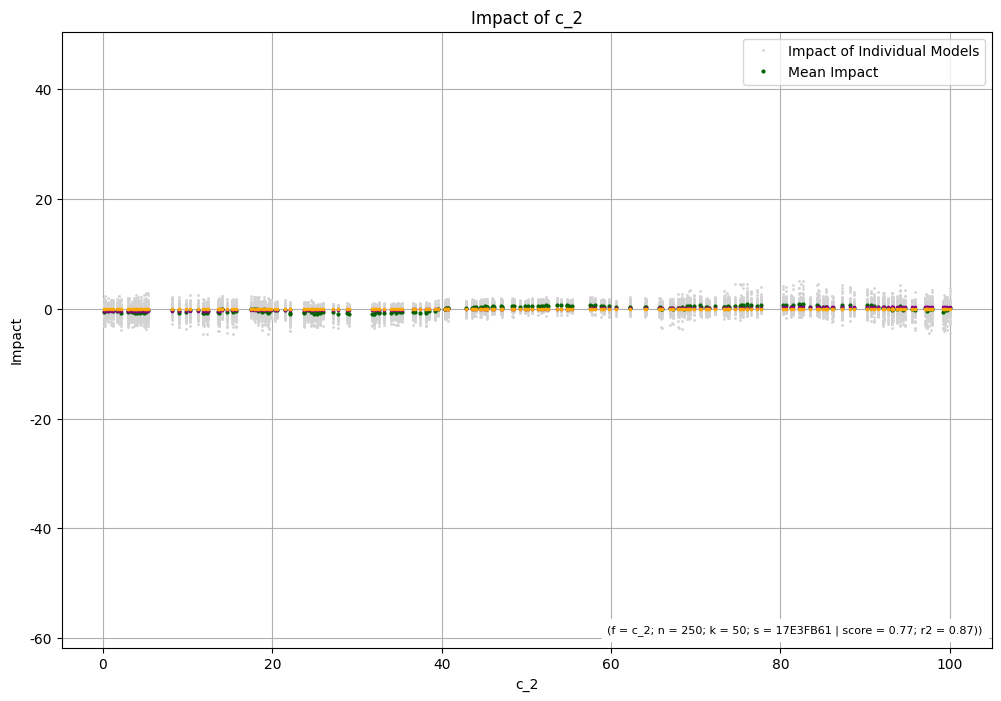

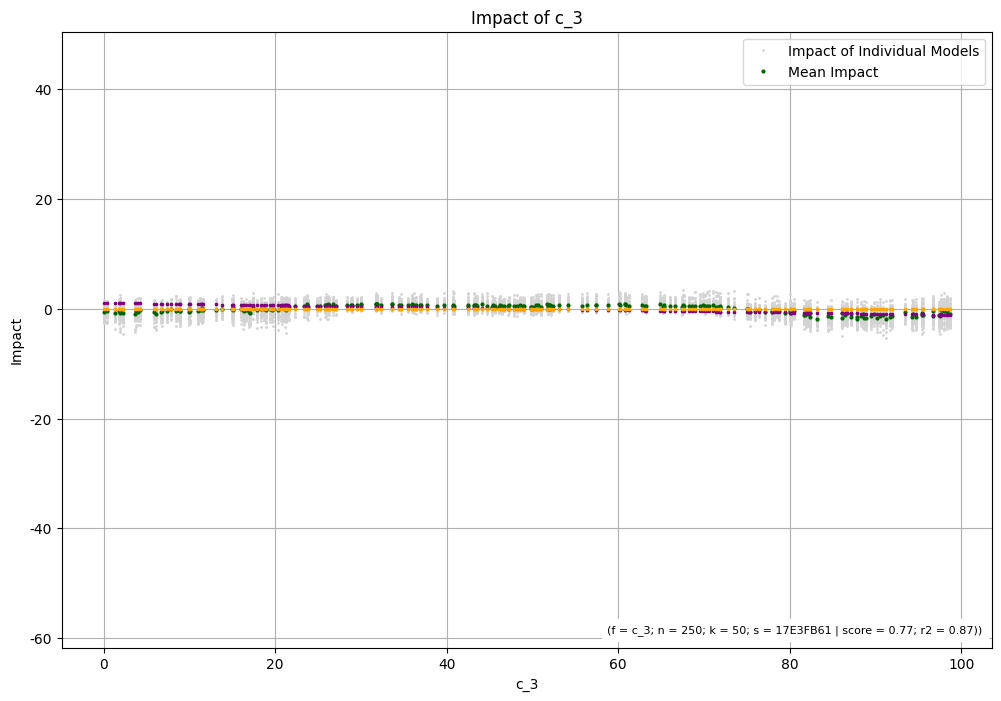

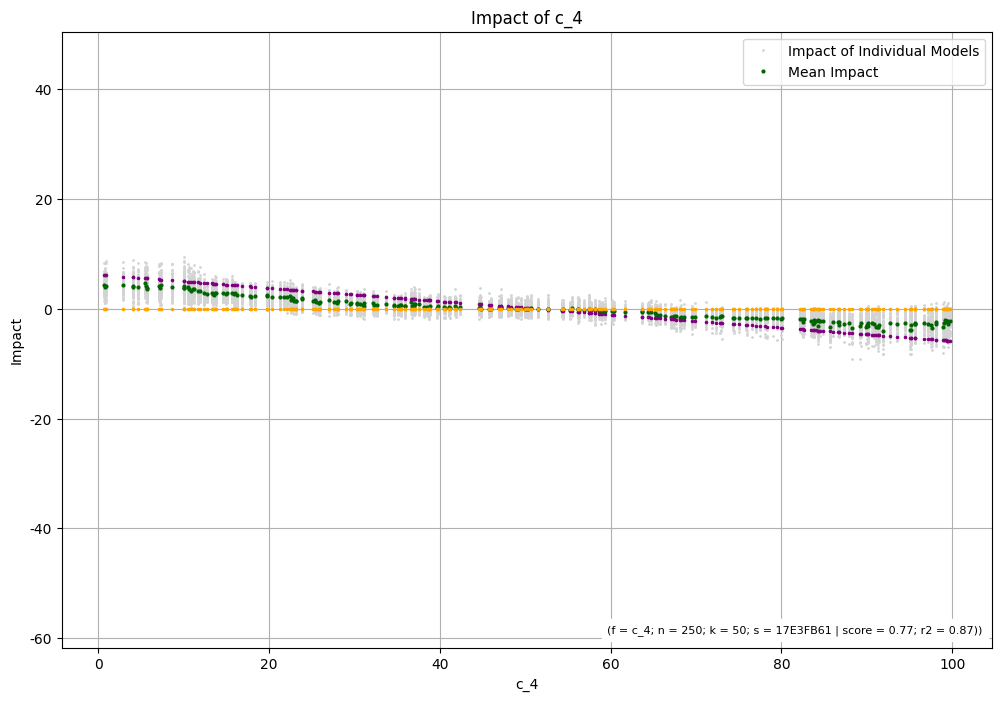

In [22]:
impact_charts = scenario.model_impact_charts(N, linreg_overlay=True)

### Generate Metrics

In [23]:
scenario.model_errors(N, linreg_errors=True)

,metric,x_0,x_1,x_2,x_3,c_0,c_1,c_2,c_3,c_4,mu_x_i,mu_c_i
0,RMSE,4.760756,1.869018,2.515394,4.627655,0.941681,0.411403,0.470220,0.723372,2.129244,3.443206,0.935184
0,MAE,3.619506,1.503562,1.770212,3.360727,0.755064,0.318846,0.409968,0.623251,1.729395,2.563502,0.767305
0,MED_AE,2.619789,1.372805,1.055688,2.414268,0.698283,0.259838,0.412901,0.571906,1.615718,1.865638,0.711729
0,LR_RMSE,0.364961,1.531634,0.854936,0.248090,2.570964,0.662018,0.252185,0.634688,3.532778,0.749905,1.530527
0,LR_MAE,0.316248,1.336541,0.743036,0.212780,2.223211,0.564495,0.219226,0.552978,3.088344,0.652151,1.329651
0,LR_MED_AE,0.304522,1.265838,0.712061,0.205917,2.228187,0.547990,0.216246,0.573942,3.141904,0.622084,1.341654


In [24]:
scenario.linreg_r2(N)

0.8411454380785506

## A Multi-Scenario Experiment

In [25]:
experiment = ise.LinearWithNoiseExperiment(m=M, s=S, sigma=SIGMA)

In [26]:
df_model_errors = experiment.model_errors(N, linreg_errors=True)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Fitting 5 folds for each of 200 candidates, totalling 1000 fits


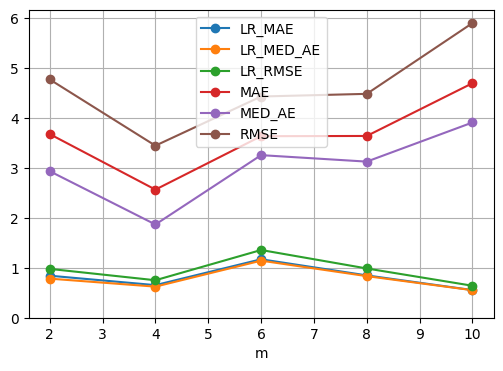

In [27]:
ax = None

for name, df_group in df_model_errors.groupby("metric"):
    ax = df_group.plot("m", "mu_x_i", marker="o", ax=ax, label=name, figsize=(6, 4))

ax.set_ylim(0.0, None)
ax.grid()

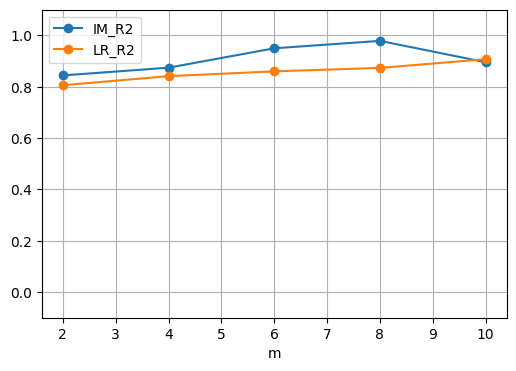

In [28]:
df_r2 = df_model_errors[df_model_errors["metric"] == "RMSE"][["m", "IM_R2", "LR_R2"]]

ax = df_r2.plot("m", "IM_R2", marker="o", figsize=(6, 4))
ax = df_r2.plot("m", "LR_R2", marker="o", ax=ax)

ax.set_ylim(-0.1, 1.1)
ax.grid()